In [1]:
# !pip install pandas_datareader

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

%matplotlib inline

# Chapter 3<br>Interpolation

## 3.4 Cubic Splines

In [3]:
def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)
    
    def coef(points):
        if len(points) == 1:
            return points[0, 1]
        return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

In [4]:
def cubic_spline(x_i, y_i, x, end="Natural", v=(0, 0)):
    x_i = np.array(x_i)
    y_i = np.array(y_i)

    dx = x_i[1:] - x_i[:-1]
    dy = y_i[1:] - y_i[:-1]
    n = len(x_i)

    M = np.zeros((n, n))
    N = np.zeros(n)

    for i in range(1, n-1):
        M[i, i-1] = dx[i-1]
        M[i, i] = 2*(dx[i-1] + dx[i])
        M[i, i+1] = dx[i]

        N[i] = 3*(dy[i]/dx[i] - dy[i-1]/dx[i-1])
    
    if end == "Natural":
        M[0, 0] = 1
        M[-1, -1] = 1

    elif end == "Curvature":
        M[0, 0] = 2
        M[-1, -1] = 2
        N[0] = v[0]
        N[-1] = v[-1]        
        
    elif end == "Clamped":
        M[0, :2] = [2*dx[0], dx[0]]
        M[-1, -2:] = [dx[-1], 2*dx[-1]]
        N[0] = 3*(dy[0]/dx[0] - v[0])
        N[-1] = 3*(v[-1] - dy[-1]/dx[-1])
        
    elif end == "Parabolic":
        M[0, :2] = [1, -1]
        M[-1, -2:] = [1, -1]
        
    elif end == "Not_a_knot":
        M[0, :3] = [dx[1], -(dx[0] + dx[1]), dx[0]]
        M[-1, -3:] = [dx[-1], -(dx[-2] + dx[-1]), dx[-1]]
        
    else:
        M[0] = end_condition[0][:-1]
        M[-1] = end_condition[-1][:-1]
        N[0] = end_condition[0, -1]
        N[-1] = end_condition[-1, -1]
    
    N = N.reshape(-1, 1)
    c = np.linalg.inv(M).dot(N).reshape(-1)

    a = y_i[:-1]
    b = dy/dx - dx*(2*c[:-1] + c[1:])/3
    d = (c[1:] - c[:-1])/(3 * dx)
    c = c[:-1]

    for i in range(n-1):
        if x_i[i] <= x and x <= x_i[i+1]:
            return a[i] + b[i]*(x - x_i[i]) + c[i]*(x - x_i[i])**2 + d[i]*(x - x_i[i])**3

### Q. 1

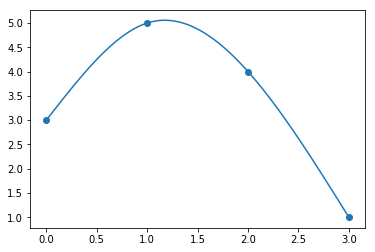

In [5]:
# (a)
x_i = [0, 1, 2, 3]
y_i = [3, 5, 4, 1]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

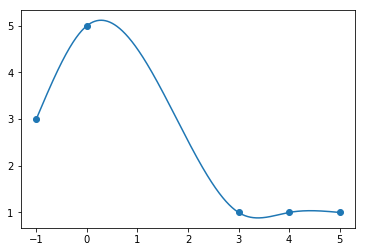

In [6]:
# (b)
x_i = [-1, 0, 3, 4, 5]
y_i = [3, 5, 1, 1, 1]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

### Q. 2

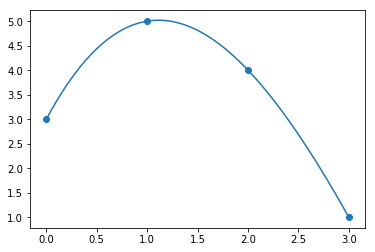

In [7]:
# (a)
x_i = [0, 1, 2, 3]
y_i = [3, 5, 4, 1]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Not_a_knot") for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

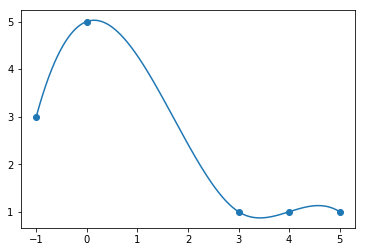

In [8]:
# (b)
x_i = [-1, 0, 3, 4, 5]
y_i = [3, 5, 1, 1, 1]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Not_a_knot") for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

### Q. 3

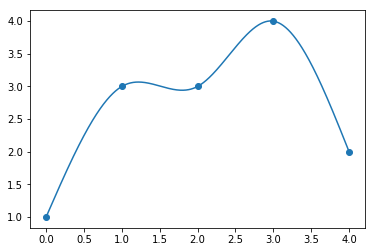

In [9]:
x_i = [0, 1, 2, 3, 4]
y_i = [1, 3, 3, 4, 2]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x) for x in x_range] # Same with Natural spline.
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

### Q. 4

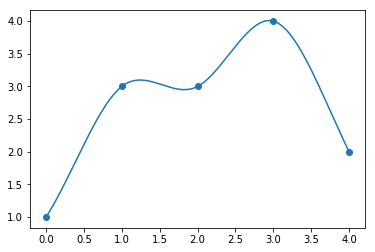

In [10]:
x_i = [0, 1, 2, 3, 4]
y_i = [1, 3, 3, 4, 2]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Curvature", v=(3, 2)) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

### Q. 5

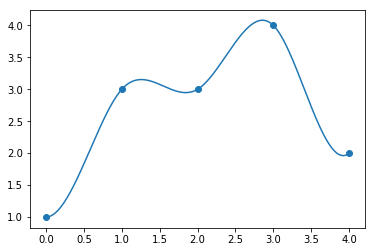

In [11]:
x_i = np.array([0, 1, 2, 3, 4])
y_i = np.array([1, 3, 3, 4, 2])

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Clamped", v=(0, 1)) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

### Q. 6

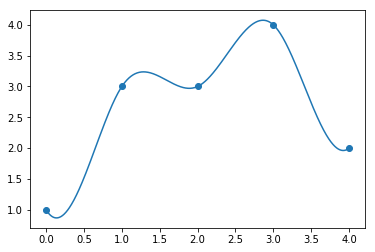

In [12]:
x_i = np.array([0, 1, 2, 3, 4])
y_i = np.array([1, 3, 3, 4, 2])

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Clamped", v=(-2, 1)) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

### Q. 7

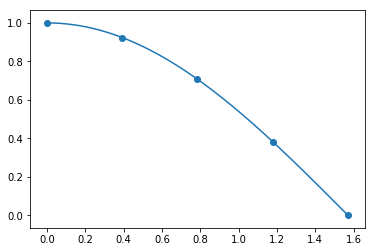

In [13]:
x_i = np.linspace(0, np.pi/2, 5)
y_i = np.cos(x_i)

v = (0, -1) # (cos'(0), cos'(pi/2))

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Clamped", v=v) for x in x_range]

plt.scatter(x_i, y_i)
plt.plot(x_range, y_range) # It is enough to plot on [0, pi/2], which is the fundamental domain of cos x.
plt.show()

In [14]:
max_error = 0
for i in x_range:
    error = abs(np.cos(i) - cubic_spline(x_i, y_i, i, end="Clamped", v=v))
    if error > max_error:
        max_error = error

print("Max error: %f" % max_error)

Max error: 0.000063


### Q. 8

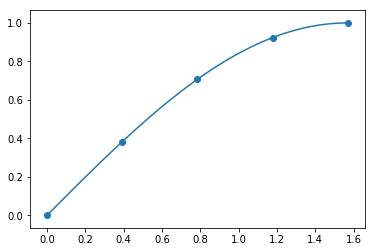

In [15]:
x_i = np.linspace(0, np.pi/2, 5)
y_i = np.sin(x_i)

v = (1, 0) # (sin'(0), sin'(pi/2))

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Clamped", v=v) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

In [16]:
max_error = 0
for i in x_range:
    error = abs(np.sin(i) - cubic_spline(x_i, y_i, i, end="Clamped", v=v))
    if error > max_error:
        max_error = error

print("Max error: %f" % max_error)

Max error: 0.000063


### Q. 9

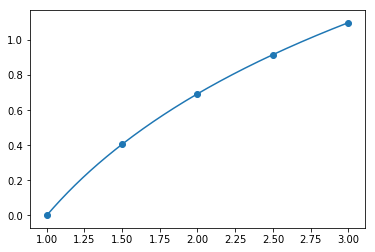

In [17]:
x_i = np.linspace(1, 3, 5)
y_i = np.log(x_i)

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Clamped", v=(1, 1/3)) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

In [18]:
max_error = 0
x_range = np.linspace(x_i[0], x_i[-1], 10000)
for i in x_range:
    error = abs(np.log(i) - cubic_spline(x_i, y_i, i, end="Clamped", v=(1, 1/3)))
    if error > max_error:
        max_error = error

print("Maximum interpolation error: %f" % max_error)

Maximum interpolation error: 0.000546


### Q. 10

In [19]:
n = 40
while True:
    x_i = np.linspace(1, 3, n)
    y_i = np.log(x_i)

    max_error = 0
    x_range = np.linspace(x_i[0], x_i[-1], 10000)
    for i in x_range:
        error = abs(np.log(i) - cubic_spline(x_i, y_i, i, end="Clamped", v=(1, 1/3)))
        if error > max_error:
            max_error = error

    print("Nodes: %d / Maximum interpolation error: %.10f" % (n, max_error))
    
    if max_error < (1e-7 / 2):
        break
    
    n += 1

Nodes: 40 / Maximum interpolation error: 0.0000001039
Nodes: 41 / Maximum interpolation error: 0.0000000940
Nodes: 42 / Maximum interpolation error: 0.0000000852
Nodes: 43 / Maximum interpolation error: 0.0000000775
Nodes: 44 / Maximum interpolation error: 0.0000000706
Nodes: 45 / Maximum interpolation error: 0.0000000644
Nodes: 46 / Maximum interpolation error: 0.0000000590
Nodes: 47 / Maximum interpolation error: 0.0000000540
Nodes: 48 / Maximum interpolation error: 0.0000000496


In [20]:
print("At least %d points are needed." % n)

At least 48 points are needed.


### Q. 11

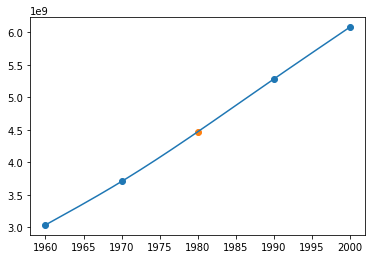

In [21]:
# (a)
x_i = np.array([1960, 1970, 1990, 2000])
y_i = np.array([3039585530, 3707475887, 5281653820, 6079603571])

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Natural") for x in x_range]
    
plt.scatter(x_i, y_i)
plt.scatter(1980, cubic_spline(x_i, y_i, 1980, end="Natural"))
plt.plot(x_range, y_range)
plt.show()

In [22]:
print("True population: %d" % 4452584592)
print("Natural cubic spline estimate: %d" % cubic_spline(x_i, y_i, 1980, end="Natural"))
print("Error: %d" % (4452584592 - cubic_spline(x_i, y_i, 1980, end="Natural")))

True population: 4452584592
Natural cubic spline estimate: 4470178717
Error: -17594125


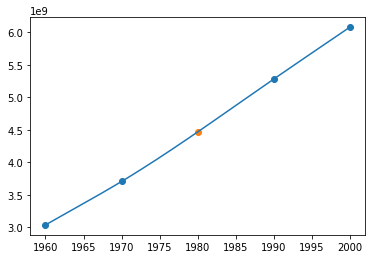

In [23]:
# (b)
dx = x_i[1:] - x_i[:-1]
dy = y_i[1:] - y_i[:-1]

v = (dy[0]/dx[0], dy[-1]/dx[-1])

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Clamped", v=v) for x in x_range]

plt.scatter(x_i, y_i)
plt.scatter(1980, cubic_spline(x_i, y_i, 1980, end="Clamped", v=v))
plt.plot(x_range, y_range)
plt.show()

In [24]:
print("True population: %d" % 4452584592)
print("Clamped cubic spline estimate: %d" % cubic_spline(x_i, y_i, 1980, end="Clamped", v=v))
print("Error: %d" % (4452584592 - cubic_spline(x_i, y_i, 1980, end="Clamped", v=v)))

True population: 4452584592
Clamped cubic spline estimate: 4468552974
Error: -15968382


Clamped cubic spline's estimate is slightly more accurate.

### Q. 12

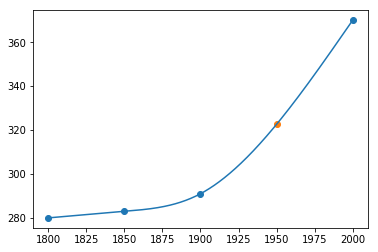

In [25]:
# (a)
x_i = [1800, 1850, 1900, 2000]
y_i = [280, 283, 291, 370]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Natural") for x in x_range]
    
plt.scatter(x_i, y_i)
plt.scatter(1950, cubic_spline(x_i, y_i, 1950, end="Natural"))
plt.plot(x_range, y_range)
plt.show()

In [26]:
print("True concentration: %d" % 310)
print("Natural cubic spline estimate: %f" % cubic_spline(x_i, y_i, 1950, end="Natural"))
print("Error: %f" % (310 - cubic_spline(x_i, y_i, 1950, end="Natural")))

True concentration: 310
Natural cubic spline estimate: 322.608696
Error: -12.608696


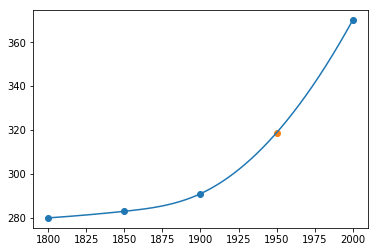

In [27]:
# (b)
x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Parabolic") for x in x_range]
    
plt.scatter(x_i, y_i)
plt.scatter(1950, cubic_spline(x_i, y_i, 1950, end="Parabolic"))
plt.plot(x_range, y_range)
plt.show()

In [28]:
print("True concentration: %d" % 310)
print("Natural cubic spline estimate: %f" % cubic_spline(x_i, y_i, 1950, end="Parabolic"))
print("Error: %f" % (310 - cubic_spline(x_i, y_i, 1950, end="Parabolic")))

True concentration: 310
Natural cubic spline estimate: 318.769231
Error: -8.769231


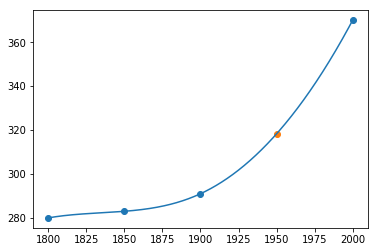

In [29]:
# (c)
x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Not_a_knot") for x in x_range]
    
plt.scatter(x_i, y_i)
plt.scatter(1950, cubic_spline(x_i, y_i, 1950, end="Not_a_knot"))
plt.plot(x_range, y_range)
plt.show()

In [30]:
print("Exercise 3.1.17's estimate: %f" % Newton(np.array([x_i, y_i]).T)(1950))
print("Not a knot cubic spline estimate: %f" % cubic_spline(x_i, y_i, 1950, end="Not_a_knot"))

Exercise 3.1.17's estimate: 316.000000
Not a knot cubic spline estimate: 318.277778


The two methods are identical, whereas the differences arise from calculation errors(probably inverse of a matrix).

### Q. 13

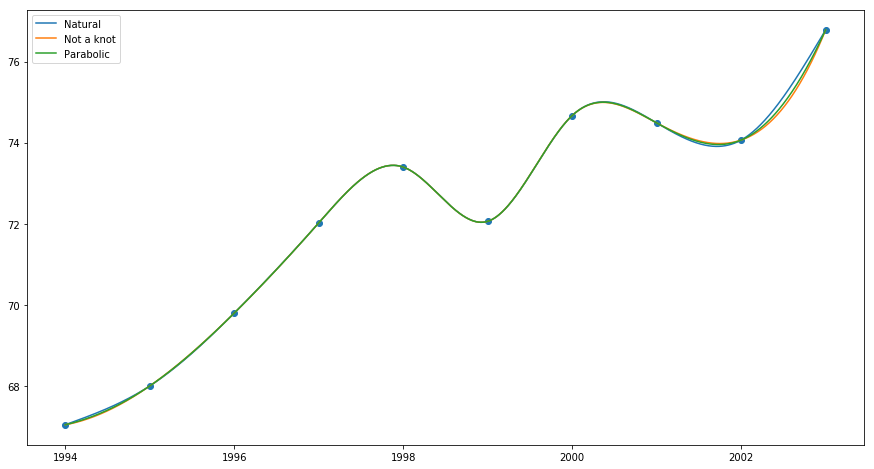

In [31]:
x_i = np.arange(1994, 2004)
y_i = np.array([67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777])
x_range = np.linspace(x_i[0], x_i[-1], 1000)

plt.figure(figsize=(15, 8))
plt.scatter(x_i, y_i)

y_range = [cubic_spline(x_i, y_i, x, end="Natural") for x in x_range]
plt.plot(x_range, y_range, label="Natural")
y_range = [cubic_spline(x_i, y_i, x, end="Not_a_knot") for x in x_range]
plt.plot(x_range, y_range, label="Not a knot")
y_range = [cubic_spline(x_i, y_i, x, end="Parabolic") for x in x_range]
plt.plot(x_range, y_range, label="Parabolic")

plt.legend()
plt.show()

### Q. 14

In [32]:
google = web.DataReader('GOOG', 'robinhood')[-101:].close_price

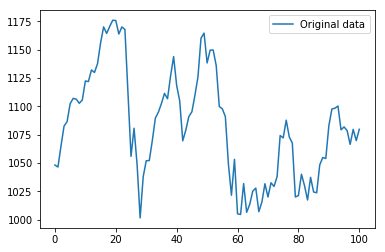

In [33]:
# (a)
plt.plot(np.arange(101), google.get_values().astype(float), label="Original data")
plt.legend()

plt.show()

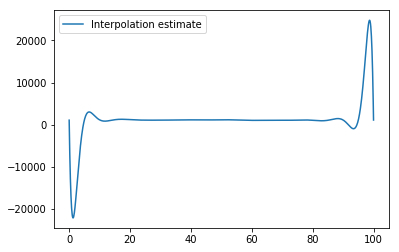

In [34]:
x_i = np.arange(0, 101, 5)
y_i = google[x_i].get_values().astype(float)
points = np.array([x_i, y_i]).T
f = Newton(points)

x_range = np.linspace(0, 100, 1000)
y_range = f(x_range)

plt.plot(x_range, y_range, label="Interpolation estimate")
plt.legend()

plt.show()

In [35]:
max_error = 0
for i in range(101):
    error = abs(float(google[i]) - f(i))
    if error > max_error:
        max_error = error

print("Max error: %f" % max_error)

Max error: 22906.814793


Obviously, Runge phenomenon has occured in the polynomial.

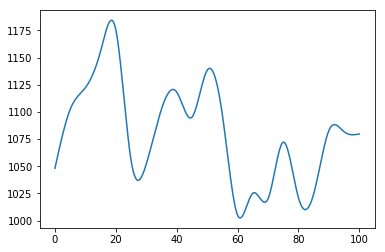

In [36]:
# (b)
x_i = np.arange(0, 101, 5)
y_i = google[x_i].get_values().astype(float)

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x, end="Natural") for x in x_range]

plt.plot(x_range, y_range)
plt.show()

In [37]:
max_error = 0
for i in range(101):
    error = abs(float(google[i]) - cubic_spline(x_i, y_i, i, end="Natural"))
    if error > max_error:
        max_error = error

print("Max error: %f" % max_error)

Max error: 63.441093


Runge phenomenon has not occured in this natural cubic spline polynomial.

In [38]:
# (c)

As cubic spline method is a collection of low degree polynomials, it essentially avoids Runge phenomenon. However, interpolating 21 nodes inevitably leads to a huge error(Runge phenomenon).

### Q. 15

omit